In [218]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
#from ridgeplot import ridgeplot
import joypy

Vom genera date x si y care sa respecte asumptiile, iar apoi alte exemple astfel incat un model liniar sa aiba incalcate diferite asumptii.


In [219]:
#generam datele de venit

n_observations = 100000

#normal distributed scenario
# mean_income = 10000
# std_income = 3000
# incomes = np.random.normal(loc=mean_income, scale=std_income,size=n_observations)

#uniform distributed
low_param = 2000
high_param = 25000
incomes = np.random.uniform(low=low_param, high=high_param,size=n_observations)

df = pd.DataFrame({'income':incomes})
df


,income
0,4965.550212
1,21697.394925
2,15670.001545
3,12472.103795
4,12228.306063
...,...
99995,15829.991552
99996,17901.646956
99997,14099.287033
99998,18859.250469


1. Generam datele y, de consum, care ar respecta ipotezele, intrucat simulam o relatie liniara in parametri si cu o eroare normal distribuita cu medie 0 si std constanta

In [220]:
b0 = 1000
b1 = 0.6
error_mean = 0
error_std = 500

def generate_consumtion(x: float, beta0: float, beta1: float, error_mean: float, error_std: float)->float:
    y = beta0 + beta1*x + np.random.normal(loc=error_mean, scale=error_std)
    return y

df['consumption_v1'] = df['income'].apply(generate_consumtion, args=(b0, b1, error_mean, error_std))
df

,income,consumption_v1
0,4965.550212,3898.241190
1,21697.394925,13458.237441
2,15670.001545,10772.253584
3,12472.103795,8050.454709
4,12228.306063,8406.008702
...,...,...
99995,15829.991552,11154.715439
99996,17901.646956,11366.847842
99997,14099.287033,9421.860436
99998,18859.250469,12400.433239


2. Definim un alt consum, care ar avea o varianta a erorilor diferita

In [221]:
def generate_consumtion_v2(x: float, beta0: float, beta1: float, error_mean: float, error_std: float)->float:
    #generam o un error_std in functie de x, cu cat x e mai mare, varianta erorilor va creste
    error_std_updated = x*0.0005*error_std
    y = beta0 + beta1*x + np.random.normal(loc=error_mean, scale=error_std_updated)
    return y

df['consumption_v2'] = df['income'].apply(generate_consumtion_v2, args=(b0, b1, error_mean, error_std))
df

,income,consumption_v1,consumption_v2
0,4965.550212,3898.241190,5875.509659
1,21697.394925,13458.237441,18837.389882
2,15670.001545,10772.253584,8939.576894
3,12472.103795,8050.454709,10485.826182
4,12228.306063,8406.008702,7350.754950
...,...,...,...
99995,15829.991552,11154.715439,16439.989557
99996,17901.646956,11366.847842,5202.046582
99997,14099.287033,9421.860436,8778.218996
99998,18859.250469,12400.433239,17156.402803


3. Generam un model care are media conditionata a erorilor diferita de 0

In [222]:
errs = np.random.normal(loc=100, scale=error_std,size=1000)
errs.mean()

103.2457209098387

In [223]:
def generate_consumtion_v3(x: float, beta0: float, beta1: float, error_mean: float, error_std: float)->float:
    #generam o un error_std in functie de x, cu cat x e mai mare, varianta erorilor va creste
    error_mean_updated = error_mean
    if (x > 7000) & (x < 9000):
        error_mean_updated = error_mean + x*0.3
    if (x > 9000) & (x <11000):
        error_mean_updated = error_mean - x*0.3
    y = beta0 + beta1*x + np.random.normal(loc=error_mean_updated, scale=error_std)
    return y

df['consumption_v3'] = df['income'].apply(generate_consumtion_v3, args=(b0, b1, error_mean, error_std))
df

,income,consumption_v1,consumption_v2,consumption_v3
0,4965.550212,3898.241190,5875.509659,3739.899063
1,21697.394925,13458.237441,18837.389882,14214.778655
2,15670.001545,10772.253584,8939.576894,9976.391910
3,12472.103795,8050.454709,10485.826182,7727.824919
4,12228.306063,8406.008702,7350.754950,8870.638156
...,...,...,...,...
99995,15829.991552,11154.715439,16439.989557,10437.170170
99996,17901.646956,11366.847842,5202.046582,12533.945522
99997,14099.287033,9421.860436,8778.218996,10260.125499
99998,18859.250469,12400.433239,17156.402803,12482.096389


4. Generam o legatura in care erorile sunt foarte ciudate, nu au media nici, nici varianta corelate cu x.

In [224]:
def generate_consumtion_v4(x: float, beta0: float, beta1: float, error_mean: float, error_std: float)->float:
    #generam valori random pentru media erorii si pentru varianta ei
    error_mean_updated = np.random.uniform(-200,200)
    error_std_updated = np.random.uniform(0,800)
    if x>17000:
        error_mean_updated = abs(error_mean_updated) + x*0.5 #introducem un trend de deplasare a erorilor DOAR pentru valori mari
    y = beta0 + beta1*x + np.random.normal(loc=error_mean_updated, scale=error_std_updated)
    return y

df['consumption_v4'] = df['income'].apply(generate_consumtion_v4, args=(b0, b1, error_mean, error_std))
df

,income,consumption_v1,consumption_v2,consumption_v3,consumption_v4
0,4965.550212,3898.241190,5875.509659,3739.899063,3439.310044
1,21697.394925,13458.237441,18837.389882,14214.778655,31314.446066
2,15670.001545,10772.253584,8939.576894,9976.391910,10468.965622
3,12472.103795,8050.454709,10485.826182,7727.824919,9126.947145
4,12228.306063,8406.008702,7350.754950,8870.638156,8327.194660
...,...,...,...,...,...
99995,15829.991552,11154.715439,16439.989557,10437.170170,11687.195447
99996,17901.646956,11366.847842,5202.046582,12533.945522,12697.512816
99997,14099.287033,9421.860436,8778.218996,10260.125499,8981.777004
99998,18859.250469,12400.433239,17156.402803,12482.096389,11726.489913


In [225]:
#definim cazurile de consum
scenarii_simulate_versiuni = [1,2,3,4]
scenarii_simulate_denumiri = [f'consumption_v{i}' for i in scenarii_simulate_versiuni]


In [226]:
#estimam 4 modele pentru cele 4 relatii
df_sample = df.sample(1000)
print(f"Rezultate modele estimate\n")
for scenariu in scenarii_simulate_versiuni:
    formula = f"consumption_v{scenariu}~income"
    nume_model = f'model_v{scenariu}'
    globals()[nume_model] = smf.ols(formula=formula,data=df_sample).fit()
    print(f"Versiunea {scenariu}:\n")
    print(eval(nume_model).summary())
    print("\n\n")


Rezultate modele estimate

Versiunea 1:

                            OLS Regression Results                            
Dep. Variable:         consumption_v1   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                 6.046e+04
Date:                Mon, 25 Mar 2024   Prob (F-statistic):               0.00
Time:                        15:56:25   Log-Likelihood:                -7645.4
No. Observations:                1000   AIC:                         1.529e+04
Df Residuals:                     998   BIC:                         1.530e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  

In [227]:
#scriem predictiile
for scenariu in scenarii_simulate_versiuni:
    nume_model = f'model_v{scenariu}'
    df[f"pred_v{scenariu}"] = globals()[nume_model].predict(df['income'])


#calculam erorile
for scenariu in scenarii_simulate_versiuni:
    df[f"error_v{scenariu}"] = df[f'consumption_v{scenariu}'] - df[f'pred_v{scenariu}']

df


,income,consumption_v1,consumption_v2,consumption_v3,consumption_v4,pred_v1,pred_v2,pred_v3,pred_v4,error_v1,error_v2,error_v3,error_v4
0,4965.550212,3898.241190,5875.509659,3739.899063,3439.310044,3967.145316,4078.350594,4109.371927,1019.723490,-68.904126,1797.159065,-369.472864,2419.586554
1,21697.394925,13458.237441,18837.389882,14214.778655,31314.446066,14000.420562,13956.929693,13944.251387,25630.995405,-542.183121,4880.460189,270.527268,5683.450661
2,15670.001545,10772.253584,8939.576894,9976.391910,10468.965622,10386.085273,10398.321346,10401.385172,16765.157839,386.168311,-1458.744452,-424.993263,-6296.192217
3,12472.103795,8050.454709,10485.826182,7727.824919,9126.947145,8468.461192,8510.263787,8521.679770,12061.293295,-418.006483,1975.562395,-793.854850,-2934.346151
4,12228.306063,8406.008702,7350.754950,8870.638156,8327.194660,8322.267524,8366.324179,8378.376903,11702.685361,83.741178,-1015.569229,492.261252,-3375.490701
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,15829.991552,11154.715439,16439.989557,10437.170170,11687.195447,10482.023516,10492.780383,10495.426353,17000.490980,672.691923,5947.209175,-58.256184,-5313.295533
99996,17901.646956,11366.847842,5202.046582,12533.945522,12697.512816,11724.294720,11715.897865,11713.133159,20047.738628,-357.446878,-6513.851282,820.812363,-7350.225811
99997,14099.287033,9421.860436,8778.218996,10260.125499,8981.777004,9444.204010,9470.962300,9478.128463,14454.756169,-22.343574,-692.743303,781.997036,-5472.979164
99998,18859.250469,12400.433239,17156.402803,12482.096389,11726.489913,12298.523072,12281.272586,12276.006845,21456.300615,101.910166,4875.130217,206.089544,-9729.810703


In [228]:
df.head()

,income,consumption_v1,consumption_v2,consumption_v3,consumption_v4,pred_v1,pred_v2,pred_v3,pred_v4,error_v1,error_v2,error_v3,error_v4
0,4965.550212,3898.241190,5875.509659,3739.899063,3439.310044,3967.145316,4078.350594,4109.371927,1019.723490,-68.904126,1797.159065,-369.472864,2419.586554
1,21697.394925,13458.237441,18837.389882,14214.778655,31314.446066,14000.420562,13956.929693,13944.251387,25630.995405,-542.183121,4880.460189,270.527268,5683.450661
2,15670.001545,10772.253584,8939.576894,9976.391910,10468.965622,10386.085273,10398.321346,10401.385172,16765.157839,386.168311,-1458.744452,-424.993263,-6296.192217
3,12472.103795,8050.454709,10485.826182,7727.824919,9126.947145,8468.461192,8510.263787,8521.679770,12061.293295,-418.006483,1975.562395,-793.854850,-2934.346151
4,12228.306063,8406.008702,7350.754950,8870.638156,8327.194660,8322.267524,8366.324179,8378.376903,11702.685361,83.741178,-1015.569229,492.261252,-3375.490701


# Vizualizarea ipotezelor

### 1. Liniaritate

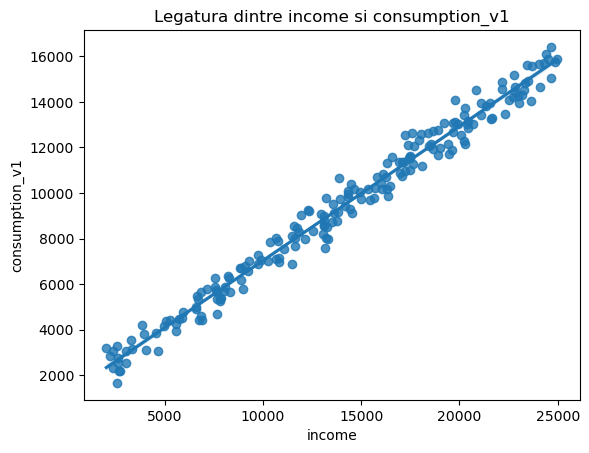

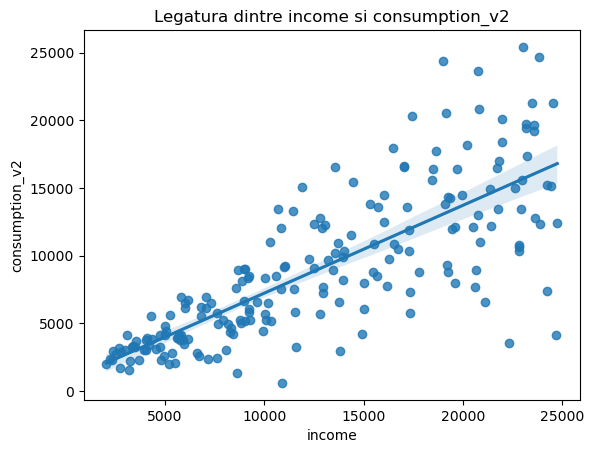

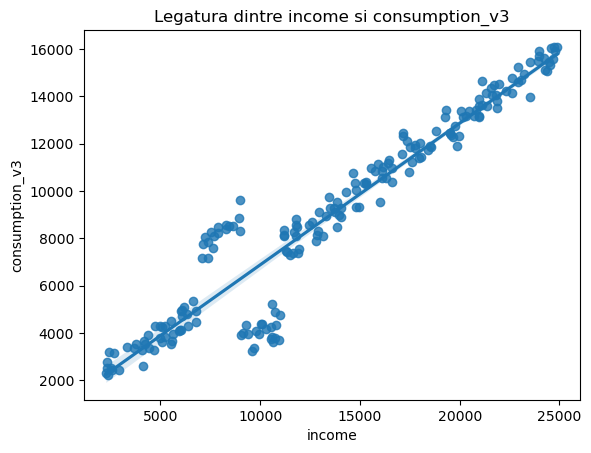

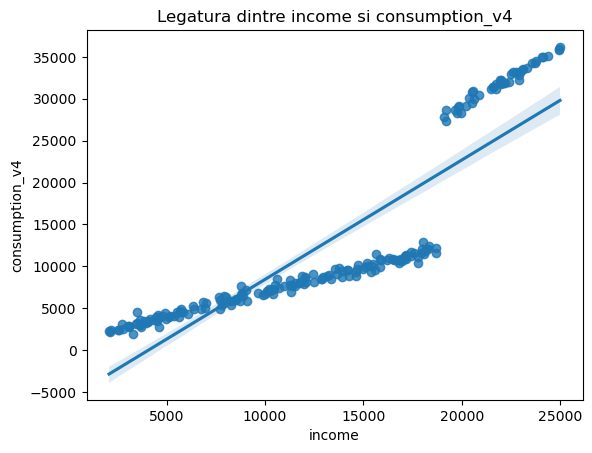

In [229]:

for scenariu in scenarii_simulate_denumiri:
    relationship_plot = sns.regplot(data=df.sample(200), x='income',y=scenariu)
    relationship_plot.set_title(f"Legatura dintre income si {scenariu}")
    plt.show()


### 2. Eroarea conditionata este 0  
### 3. Homoscedasticitatea

In [230]:
#Define the bins and labels
bins = range(2000, 30001, 500)
labels = [f"{i}_{i+500}" for i in range(2000, 30000, 500)]

# Add a new column with the interval labels
df['interval_income'] = pd.cut(df['income'], bins=bins, labels=labels, right=False)

df

,income,consumption_v1,consumption_v2,consumption_v3,consumption_v4,pred_v1,pred_v2,pred_v3,pred_v4,error_v1,error_v2,error_v3,error_v4,interval_income
0,4965.550212,3898.241190,5875.509659,3739.899063,3439.310044,3967.145316,4078.350594,4109.371927,1019.723490,-68.904126,1797.159065,-369.472864,2419.586554,4500_5000
1,21697.394925,13458.237441,18837.389882,14214.778655,31314.446066,14000.420562,13956.929693,13944.251387,25630.995405,-542.183121,4880.460189,270.527268,5683.450661,21500_22000
2,15670.001545,10772.253584,8939.576894,9976.391910,10468.965622,10386.085273,10398.321346,10401.385172,16765.157839,386.168311,-1458.744452,-424.993263,-6296.192217,15500_16000
3,12472.103795,8050.454709,10485.826182,7727.824919,9126.947145,8468.461192,8510.263787,8521.679770,12061.293295,-418.006483,1975.562395,-793.854850,-2934.346151,12000_12500
4,12228.306063,8406.008702,7350.754950,8870.638156,8327.194660,8322.267524,8366.324179,8378.376903,11702.685361,83.741178,-1015.569229,492.261252,-3375.490701,12000_12500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,15829.991552,11154.715439,16439.989557,10437.170170,11687.195447,10482.023516,10492.780383,10495.426353,17000.490980,672.691923,5947.209175,-58.256184,-5313.295533,15500_16000
99996,17901.646956,11366.847842,5202.046582,12533.945522,12697.512816,11724.294720,11715.897865,11713.133159,20047.738628,-357.446878,-6513.851282,820.812363,-7350.225811,17500_18000
99997,14099.287033,9421.860436,8778.218996,10260.125499,8981.777004,9444.204010,9470.962300,9478.128463,14454.756169,-22.343574,-692.743303,781.997036,-5472.979164,14000_14500
99998,18859.250469,12400.433239,17156.402803,12482.096389,11726.489913,12298.523072,12281.272586,12276.006845,21456.300615,101.910166,4875.130217,206.089544,-9729.810703,18500_19000


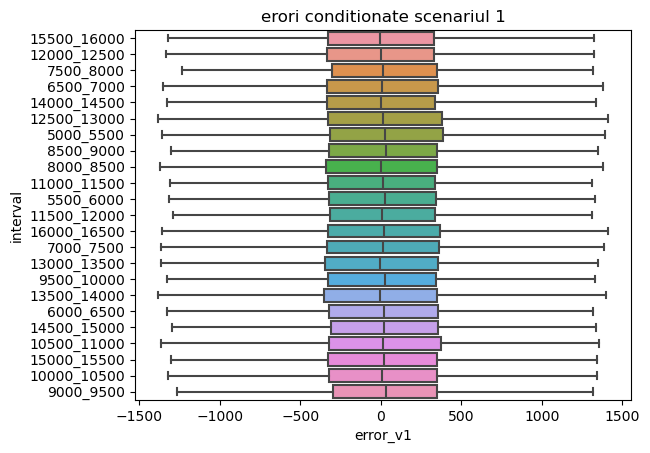

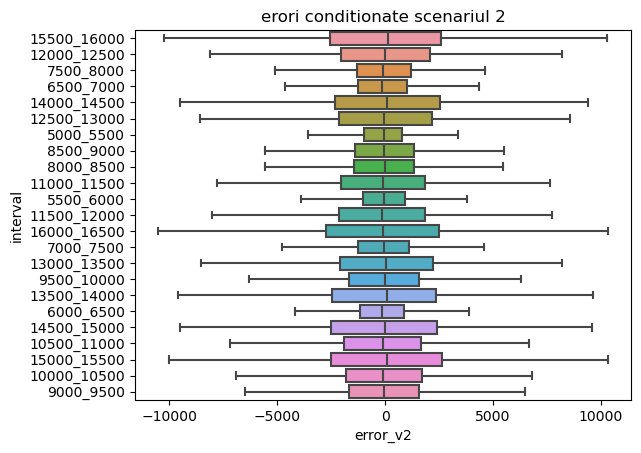

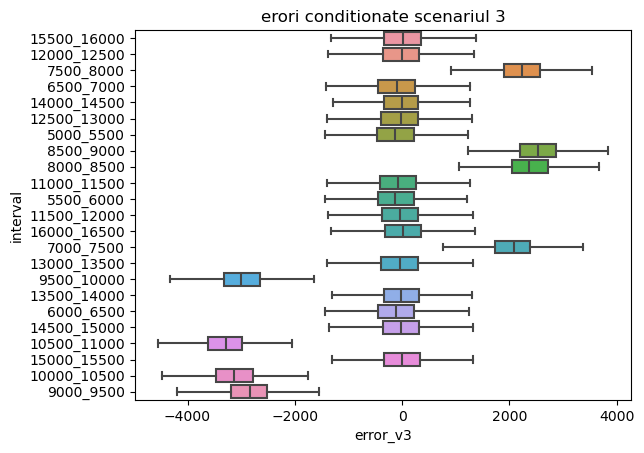

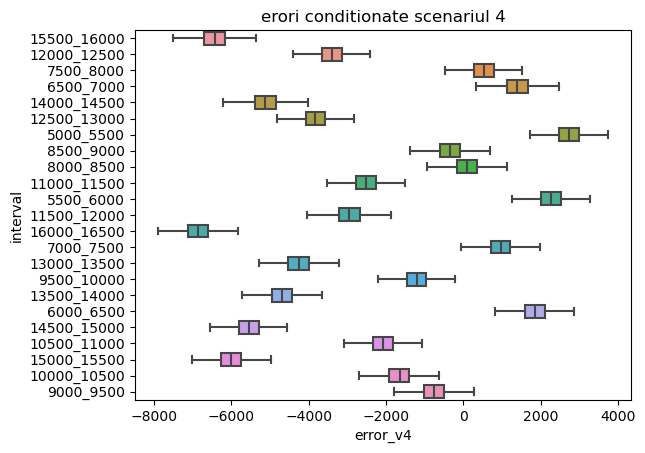

In [231]:
for scenariu in scenarii_simulate_versiuni:
    #definim un doar un subset de intervale x pentru care sa vizualizam
    df_sample2 = df[df['income'].between(5000,16500)].copy() #pot fi schimbate 5000 si 6000 cu alte valori
    df_sample2['interval'] = df_sample2['interval_income'].astype('str')
    erori_conditionat_boxplot = sns.boxplot(data=df_sample2, y='interval',x=f"error_v{scenariu}", showfliers=False)
    erori_conditionat_boxplot.set_title(f"erori conditionate scenariul {scenariu}")
    plt.show()




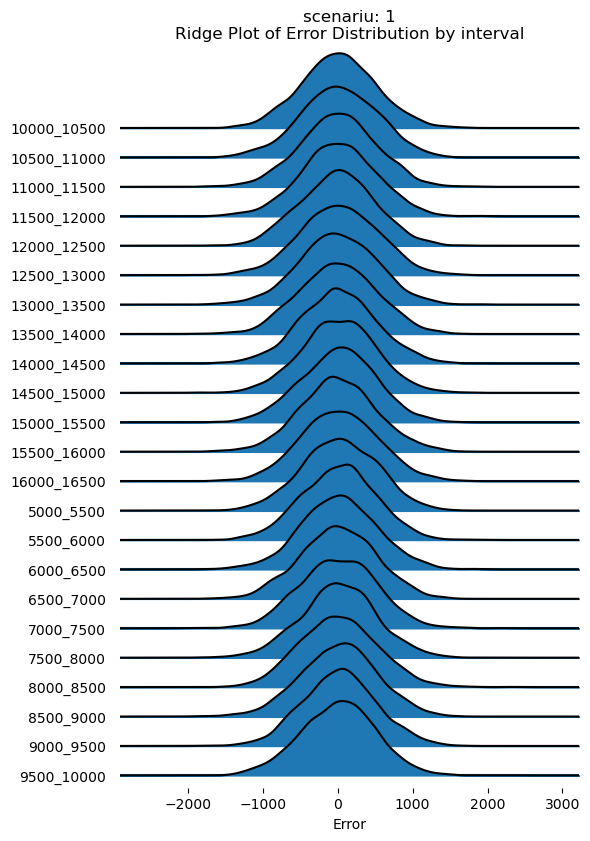

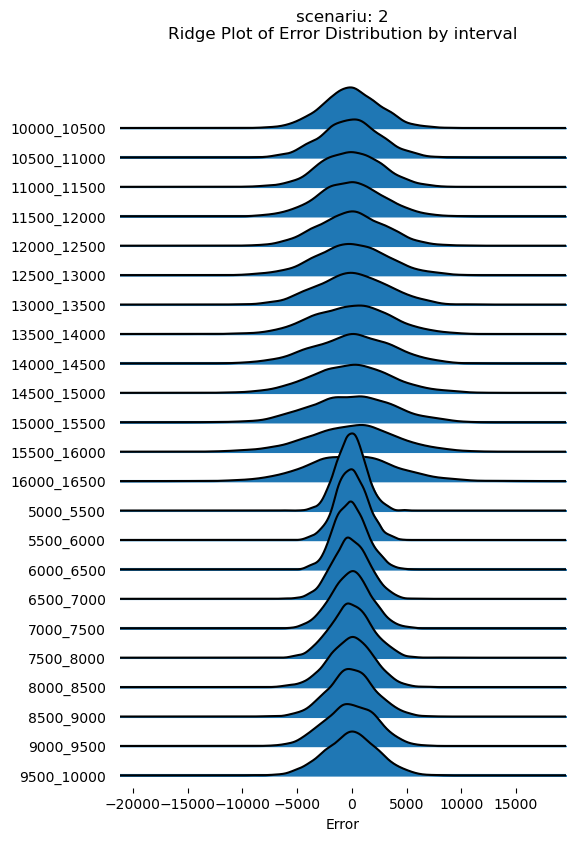

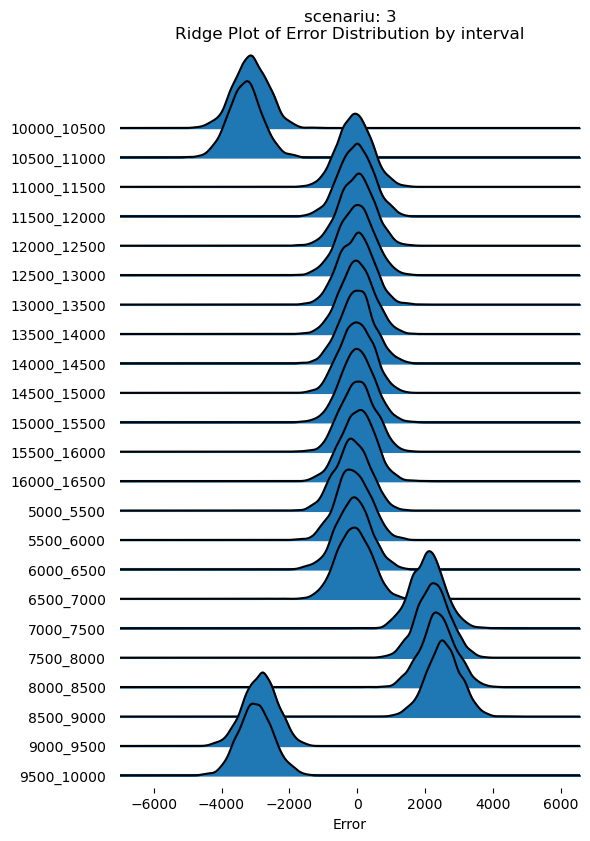

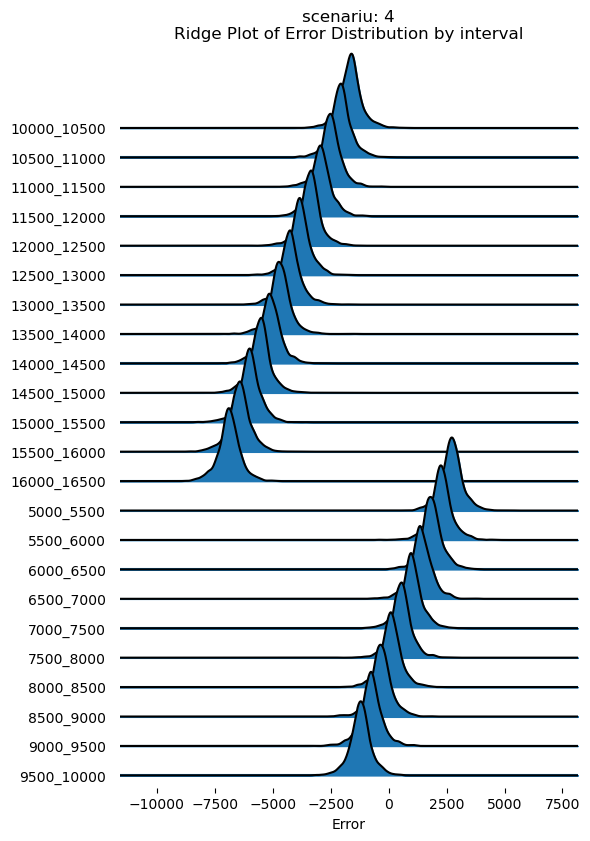

In [232]:
for scenariu in scenarii_simulate_versiuni:

    #Create a ridge plot using joypy
    fig, axes = joypy.joyplot(df_sample2, by="interval", column=f"error_v{scenariu}", figsize=(6, 8))

    # Customize the plot if needed
    plt.title(f"scenariu: {scenariu}\nRidge Plot of Error Distribution by interval")
    plt.xlabel("Error")
    plt.ylabel("Label")
    plt.show()

### 4. Variabile independente necorelate cu erorile

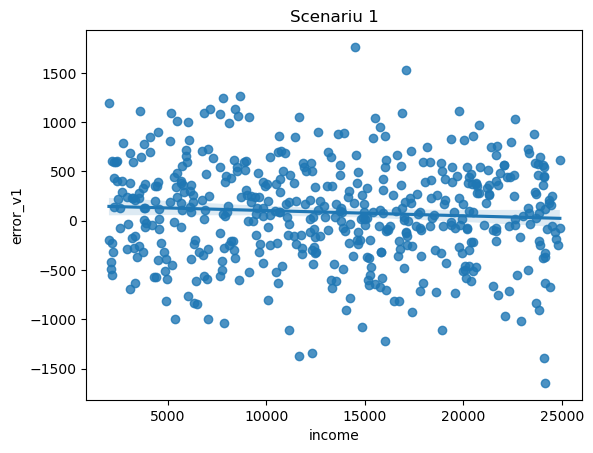

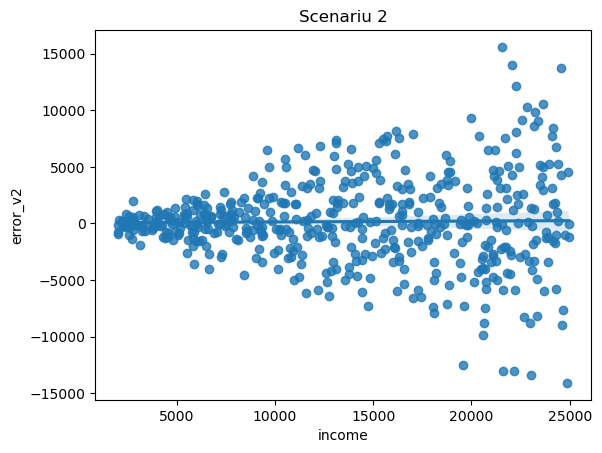

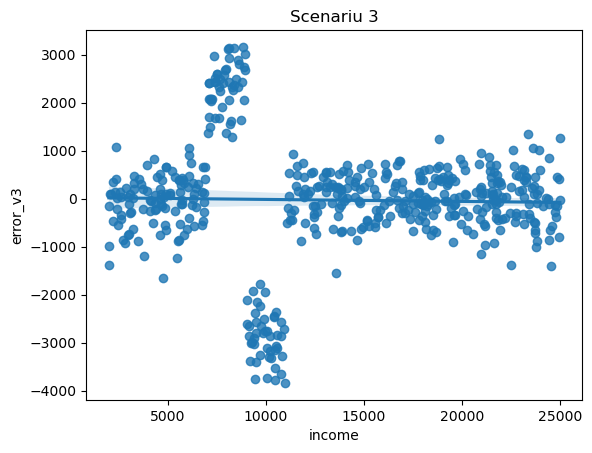

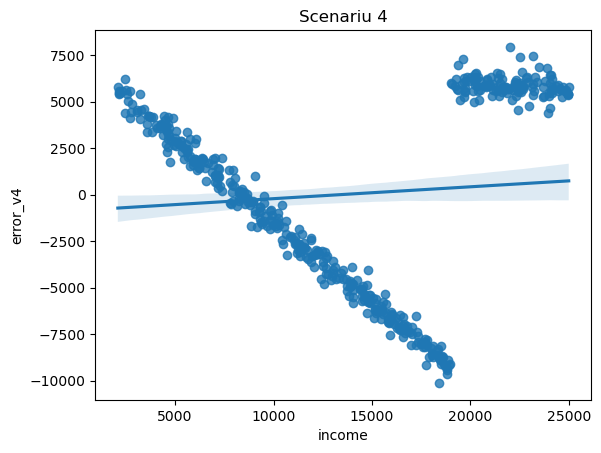

In [233]:
for scenariu in scenarii_simulate_versiuni:
    scatter_plot_errors_x = relationship_plot = sns.regplot(data=df.sample(500), x='income',y=f'error_v{scenariu}')
    scatter_plot_errors_x.set_title(f'Scenariu {scenariu}')
    plt.show()